In [1]:
from sklearn.datasets import load_sample_image
china=load_sample_image('flower.jpg')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

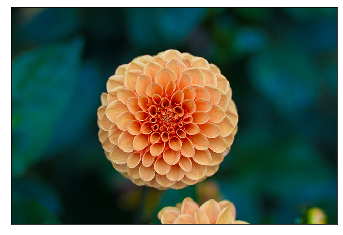

In [5]:
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [7]:
china.shape

(427, 640, 3)

In [9]:
"""reshape the data tp [n_samples] x n_features], and rescale the colors so that they lie between 0 and 1"""
data=china / 255.0 #use 0...1 scale
data=data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [11]:
#visualize the pixels in this color space, using a subset of 10000 pixels for efficiency
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors=data
        
    # choose a random subset
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R, G, B=data[i].T
    
    fig, ax = plt.subplots(1,2, figsize=(16,6))
    ax[0].scatter(R,G, color=colors,marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R,B, color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20),

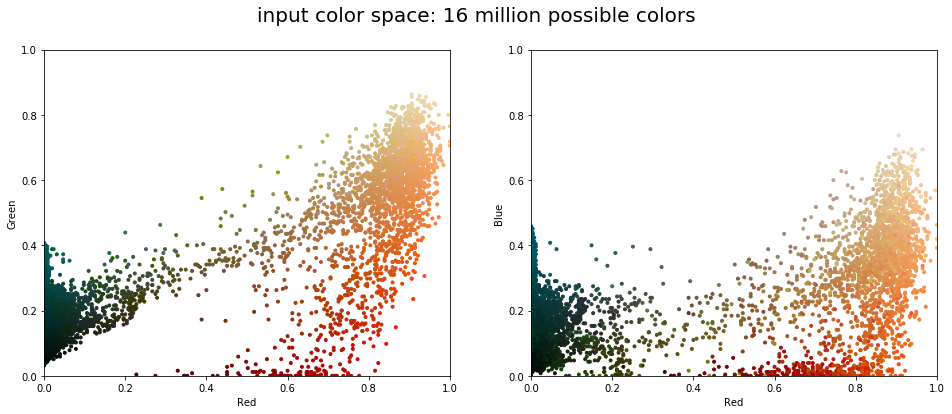

In [12]:
plot_pixels(data, title='input color space: 16 million possible colors')

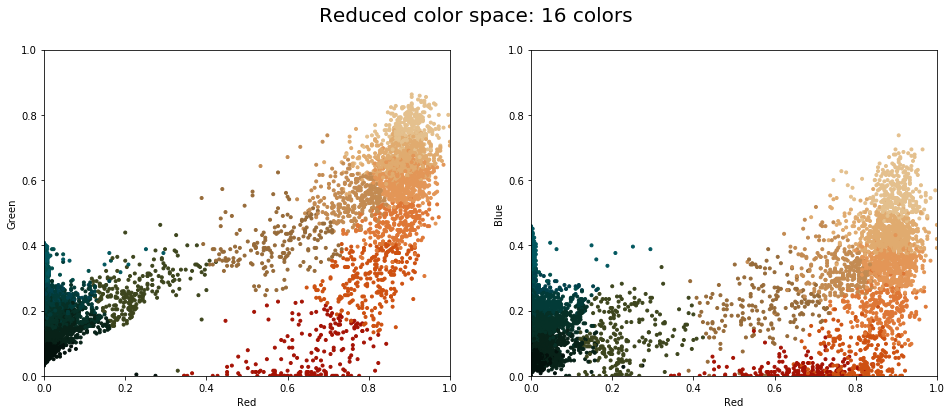

In [13]:
#fix numpy issues
import warnings; warnings.simplefilter('ignore')

#reducing these 16 million colors to just 16 colors
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

The result is re-coloring of the original pixels where each pixel is assigned the color of its closest cluster center

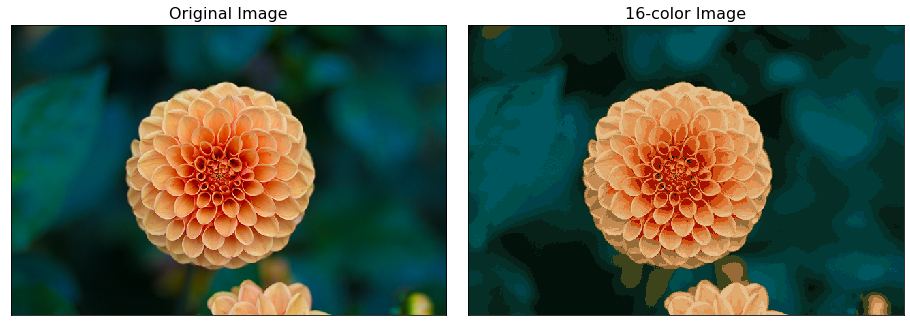

In [16]:
china_recolored=new_colors.reshape(china.shape)
fig, ax=plt.subplots(1,2, figsize=(16,6), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

### Example 2

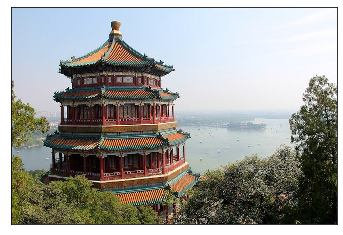

In [24]:
chin=load_sample_image("china.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(chin)

In [25]:
chin.shape

(427, 640, 3)

In [26]:
#reshape
data=chin/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

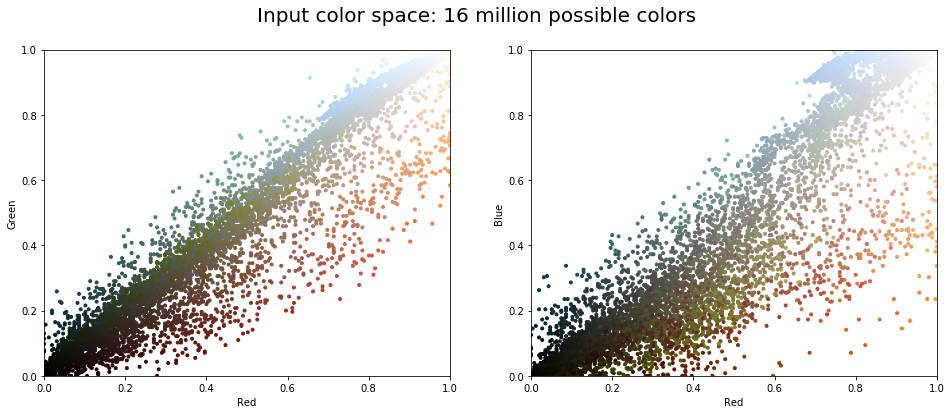

In [27]:
plot_pixels(data, title='Input color space: 16 million possible colors')